In [1]:
import wandb
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
import ipywidgets

/home/naveed/anaconda3/envs/mlflow-18ef20e05126a8b1ef59cfef3fee56b2282a998a/lib/python3.10/site-packages/wandb/sdk/launch/builder/build.py:11: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [2]:
run = wandb.init(project="nyc_airbnb", group="eda", save_code=True)
local_path = wandb.use_artifact("sample.csv:latest").file()
df = pd.read_csv(local_path)

/home/naveed/anaconda3/envs/mlflow-18ef20e05126a8b1ef59cfef3fee56b2282a998a/lib/python3.10/site-packages/wandb/sdk/launch/builder/build.py:11: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
wandb: Currently logged in as: mniqureshi (mniqureshi-launch). Use `wandb login --relogin` to force relogin


In [3]:
df.describe()

id       host_id      latitude     longitude         price  \
count  2.000000e+04  2.000000e+04  20000.000000  20000.000000  20000.000000   
mean   1.892380e+07  6.746034e+07     40.728455    -73.952125    153.269050   
std    1.101223e+07  7.857936e+07      0.054755      0.046559    243.325609   
min    2.539000e+03  2.571000e+03     40.508730    -74.239140      0.000000   
25%    9.393540e+06  7.853718e+06     40.689420    -73.983030     69.000000   
50%    1.952117e+07  3.111431e+07     40.722730    -73.955640    105.000000   
75%    2.912936e+07  1.068426e+08     40.762990    -73.936380    175.000000   
max    3.648561e+07  2.742733e+08     40.913060    -73.717950  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    20000.000000       20000.000000       15877.000000   
mean         6.992100          23.274100           1.377446   
std         21.645449          44.927793           1.683006   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.190000   
50%          2.000000           5.000000           0.720000   
75%          5.000000          23.000000           2.010000   
max       1250.000000         607.000000          27.950000   

       calculated_host_listings_count  availability_365  
count                    20000.000000      20000.000000  
mean                         6.955450        112.901200  
std                         32.433831        131.762226  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         44.000000  
75%                          2.000000        229.000000  
max                        327.000000        365.000000

In [4]:
df.isnull().sum()

id                                   0
name                                 7
host_id                              0
host_name                            8
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       4123
reviews_per_month                 4123
calculated_host_listings_count       0
availability_365                     0
dtype: int64

<Axes: ylabel='Frequency'>

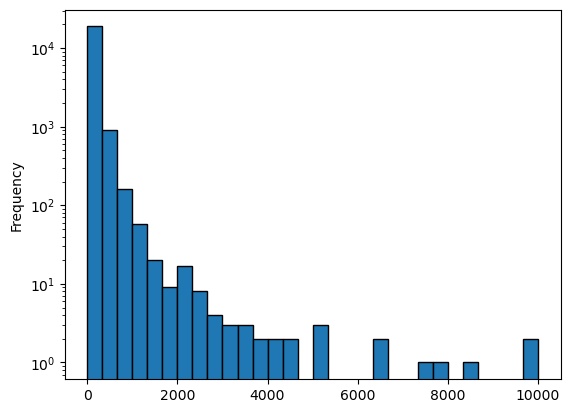

In [5]:
# price distribution
df['price'].plot(kind='hist', edgecolor='black', logy=True, bins=30)

In [6]:
df['price'].min(), df['price'].max()

(0, 10000)

<Axes: ylabel='Frequency'>

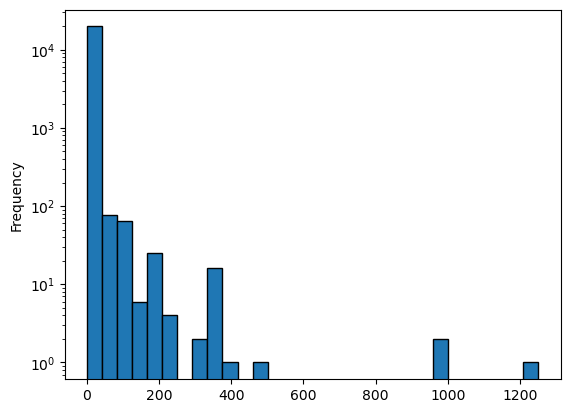

In [7]:
 # minimum_nights distribution
df['minimum_nights'].plot(kind='hist', edgecolor='black', logy=True, bins=30)

In [8]:
 # records with a price of 0
df[df['price'] == 0]

id                                               name    host_id  \
3335   21291569  Coliving in Brooklyn! Modern design / Shared room  101970559   
10555  20933849                              the best you can find   13709292   
12909  20639628  Spacious comfortable master bedroom with nice ...   86327101   
15305  20639792  Contemporary bedroom in brownstone with nice view   86327101   
18544  20624541      Modern apartment in the heart of Williamsburg   10132166   

      host_name neighbourhood_group       neighbourhood  latitude  longitude  \
3335     Sergii            Brooklyn            Bushwick  40.69211  -73.90670   
10555    Qiuchi           Manhattan         Murray Hill  40.75091  -73.97597   
12909   Adeyemi            Brooklyn  Bedford-Stuyvesant  40.68173  -73.91342   
15305   Adeyemi            Brooklyn  Bedford-Stuyvesant  40.68279  -73.91170   
18544   Aymeric            Brooklyn        Williamsburg  40.70838  -73.94645   

             room_type  price  minimum_nights  number_of_reviews last_review  \
3335       Shared room      0              30                  2  2019-06-22   
10555  Entire home/apt      0               3                  0         NaN   
12909     Private room      0               1                 93  2019-06-15   
15305     Private room      0               1                 95  2019-06-21   
18544  Entire home/apt      0               5                  3  2018-01-02   

       reviews_per_month  calculated_host_listings_count  availability_365  
3335                0.11                               6               333  
10555                NaN                               1                 0  
12909               4.28                               6               176  
15305               4.37                               6               232  
18544               0.15                               1                73

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

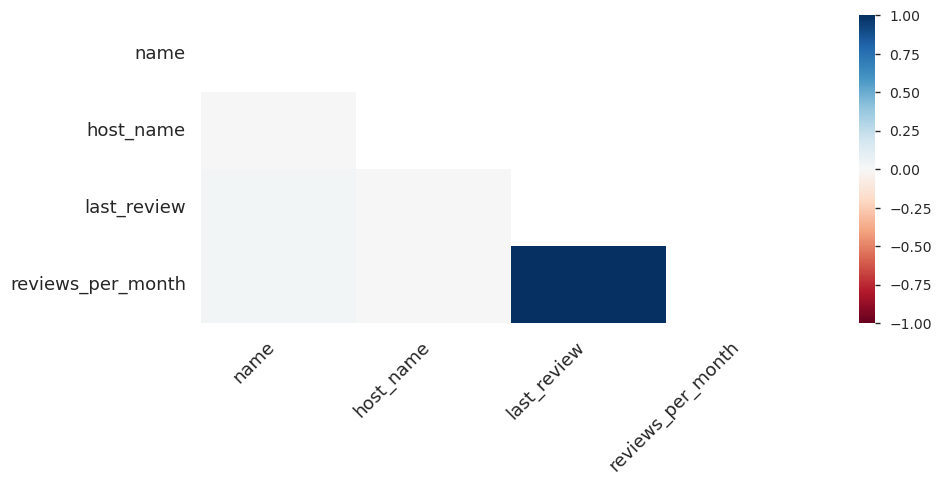

In [9]:
profile = ProfileReport(df)
profile.to_notebook_iframe()

In [10]:
# drop outliers
min_price = 10
max_price = 350
idx = df['price'].between(min_price, max_price)
df = df[idx].copy()

# convert last_review to datetime
df['last_review'] = pd.to_datetime(df['last_review'])

In [11]:
run.finish()